<a href="https://colab.research.google.com/github/Guythong/dsb-batch10/blob/main/imdb_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
imdb = pd.read_csv('/content/imdb_movies_shows.csv')

In [ ]:
imdb.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   release_year          5806 non-null   int64  
 3   age_certification     3196 non-null   object 
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   seasons               2047 non-null   float64
 8   imdb_id               5362 non-null   object 
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 499.1+ KB


In [ ]:
imdb.isnull().sum()

,0
title,1
type,0
release_year,0
age_certification,2610
runtime,0
genres,0
production_countries,0
seasons,3759
imdb_id,444
imdb_score,523


In [ ]:
import pandas as pd

def calculate_summary_stats(df, columns):
  summary_stats = pd.DataFrame()
  for col in columns:
    summary_stats[col] = {
      'Mean': df[col].mean(),
      'Median': df[col].median(),
      'Mode': df[col].mode().tolist(),
      'Variance': df[col].var(),
      'Standard Deviation': df[col].std()
    }
  return summary_stats

In [ ]:
#summary stat
stats = calculate_summary_stats(imdb, ['runtime', 'imdb_score','imdb_votes'])
print(stats)

                        runtime imdb_score         imdb_votes
Mean                  77.643989   6.533447       23407.194988
Median                     84.0        6.6             2279.0
Mode                       [24]      [6.6]       [25.0, 43.0]
Variance            1558.209324   1.347762  7592388998.435386
Standard Deviation     39.47416   1.160932       87134.315849


<Axes: ylabel='runtime'>

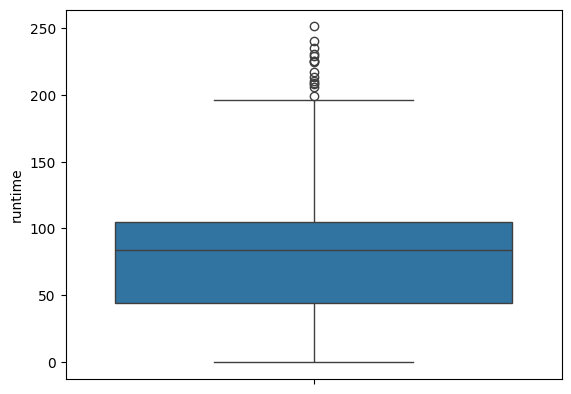

In [ ]:
sns.boxplot(imdb['runtime'])
# As we see the outliers in column runtime but those outliers is important to our data so I will keep it

#Cleaning data part

In [ ]:
#clean data by checking null values
imdb[imdb['seasons'].isnull()][['type','seasons']]


,type,seasons
1,MOVIE,NaN
2,MOVIE,NaN
3,MOVIE,NaN
4,MOVIE,NaN
6,MOVIE,NaN
...,...,...
5800,MOVIE,NaN
5801,MOVIE,NaN
5802,MOVIE,NaN
5803,MOVIE,NaN


In [ ]:
#We can asuume that every moive has null values in season column and we gonna replace 0 at columns season
imdb['seasons'] = imdb['seasons'].replace(np.nan,0)
imdb['age_certification'] = imdb['age_certification'].replace(np.nan,"None")

In [ ]:
#drop every col that have null value
imdb = imdb.dropna(how = 'any')

In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5267 entries, 1 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5267 non-null   object 
 1   type                  5267 non-null   object 
 2   release_year          5267 non-null   int64  
 3   age_certification     5267 non-null   object 
 4   runtime               5267 non-null   int64  
 5   genres                5267 non-null   object 
 6   production_countries  5267 non-null   object 
 7   seasons               5267 non-null   float64
 8   imdb_id               5267 non-null   object 
 9   imdb_score            5267 non-null   float64
 10  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 493.8+ KB


In [ ]:
#change data type
imdb['type'] = imdb['type'].astype('category')
imdb['age_certification'] = imdb['age_certification'].astype('category')
imdb['genres'] = imdb['genres'].astype('category')

In [ ]:
imdb['type'].unique()

['MOVIE', 'SHOW']
Categories (2, object): ['MOVIE', 'SHOW']

#Statistical Qustion
#Q1 Is the average IMDb score for movies in 2017-2022 higher than the average IMDB score for TV shows in 2017-2022?

In [ ]:
imdb_2017_2022 = imdb[(imdb['release_year'] >= 2017) & (imdb['release_year'] <= 2022)]
imdb_2017_2022[imdb_2017_2022['type'] == 'MOVIE']['imdb_score'].mean()

6.148126142595977

In [ ]:
imdb_2017_2022[imdb_2017_2022['type'] == 'SHOW']['imdb_score'].mean()

6.907567964731816

From the result we know that the average imdb score for TV shows is more than the average imdb score for movie. Therefore we can see that Tv show is stil popular in last 5 years form the dataset

#Q2 Which age_certification category top three get the highest IMDB_score ?

In [ ]:
average_scores_by_age_certification = imdb.groupby('age_certification')['imdb_score'].mean()
top_three = average_scores_by_age_certification.sort_values(ascending=False).head(3)
print(top_three)

age_certification
TV-14    7.262615
TV-MA    7.065909
TV-PG    6.916860
Name: imdb_score, dtype: float64


<ipython-input-47-9f7f25e10d8f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_scores_by_age_certification = imdb.groupby('age_certification')['imdb_score'].mean()


From the result we can see that the highest rated is TV-14 following by TV-MA and TV-PG respectively.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# Assuming imdb_score and runtime are columns
similarity_matrix = euclidean_distances(imdb[['imdb_score', 'runtime']])
similarity_matrix

array([[  0.        ,  22.00022727,  19.00236827, ...,  25.06471624,
          3.66196668, 113.00110619],
       [ 22.00022727,   0.        ,   3.00665928, ...,   3.44818793,
         25.07987241,  91.001978  ],
       [ 19.00236827,   3.00665928,   0.        , ...,   6.18465844,
         22.07351354,  94.00340419],
       ...,
       [ 25.06471624,   3.44818793,   6.18465844, ...,   0.        ,
         28.0016071 ,  88.03005169],
       [  3.66196668,  25.07987241,  22.07351354, ...,  28.0016071 ,
          0.        , 116.02913427],
       [113.00110619,  91.001978  ,  94.00340419, ...,  88.03005169,
        116.02913427,   0.        ]])

#We want to find probability about each age certification category in whole certification category.

In [ ]:
# Function to calculate the probability of each category in the 'age_certification' column
def calculate_probability_by_category(data, column_name):
    category_counts = data[column_name].value_counts(normalize=True).round(3)
    return category_counts.to_dict()

# Calculate probabilities for 'age_certification'
age_certification_probabilities = calculate_probability_by_category(imdb, 'age_certification')
age_certification_probabilities

{'None': 0.433,
 'TV-MA': 0.15,
 'R': 0.104,
 'TV-14': 0.083,
 'PG-13': 0.079,
 'PG': 0.045,
 'TV-PG': 0.033,
 'G': 0.02,
 'TV-Y7': 0.02,
 'TV-Y': 0.018,
 'TV-G': 0.014,
 'NC-17': 0.002}

In [ ]:
imdb['age_certification'].value_counts()

,count
age_certification,
None,2278
TV-MA,792
R,546
TV-14,436
PG-13,418
PG,237
TV-PG,172
G,105
TV-Y7,104


<Axes: xlabel='runtime', ylabel='Count'>

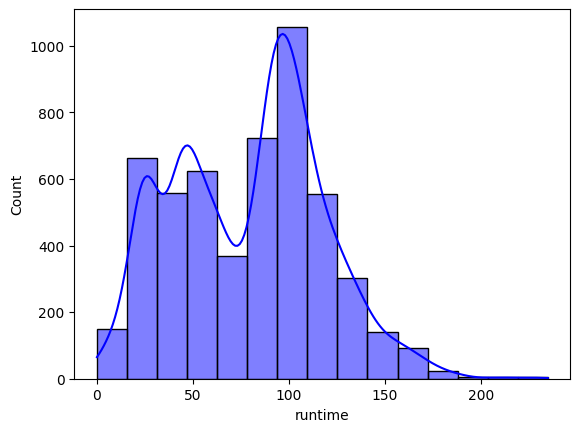

In [ ]:
#We want to see the distibution of column runtime
sns.histplot(imdb['runtime'], bins=15, kde=True, color='blue', edgecolor='black')
#We can see this is a right-skewed distribution

<Axes: xlabel='imdb_score', ylabel='Count'>

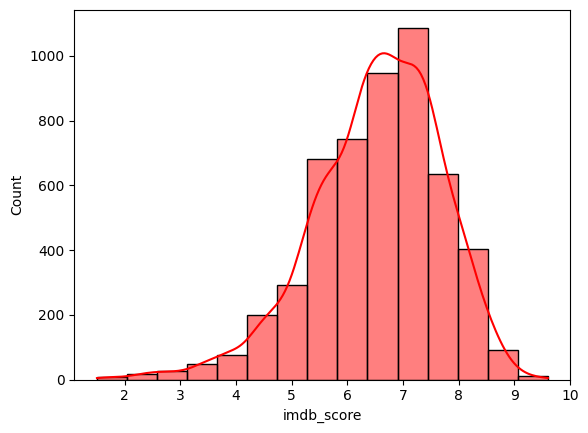

In [ ]:
#We want to see the distibution of column imdb_score
sns.histplot(imdb['imdb_score'], bins=15, kde=True, color='red', edgecolor='black')
#We can see this is a left-skewed distribution

#Data visualization part

<Axes: xlabel='type', ylabel='runtime'>

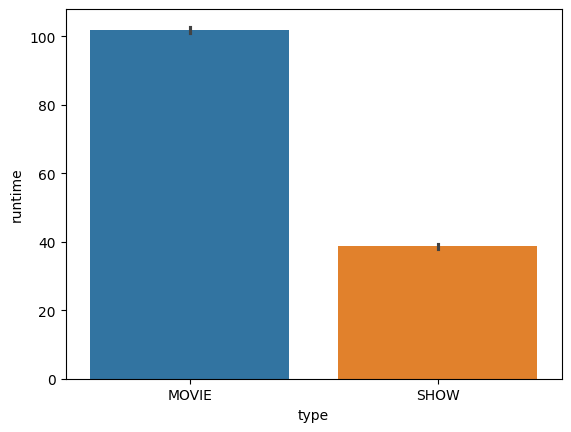

In [ ]:
#1 Barchart between type and runtime
subset = imdb[['runtime','type']]
sns.barplot(data=subset, x='type', y='runtime', hue='type')

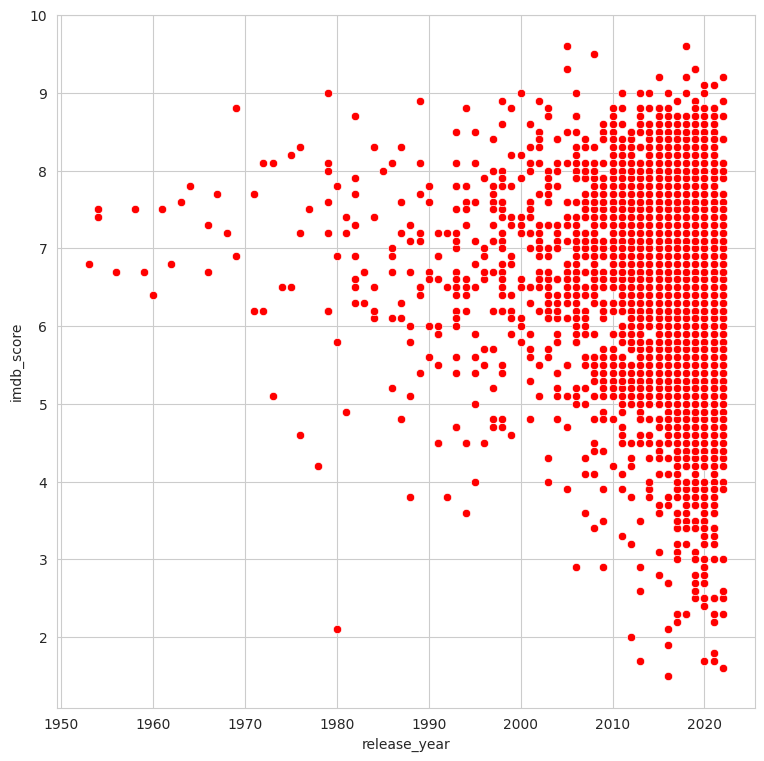

In [ ]:
#2 scatter plot imdb_score and release year
plt.figure(figsize=(9, 9))
sns.scatterplot(data = imdb ,x = 'release_year', y = 'imdb_score', color = 'red')
plt.show()

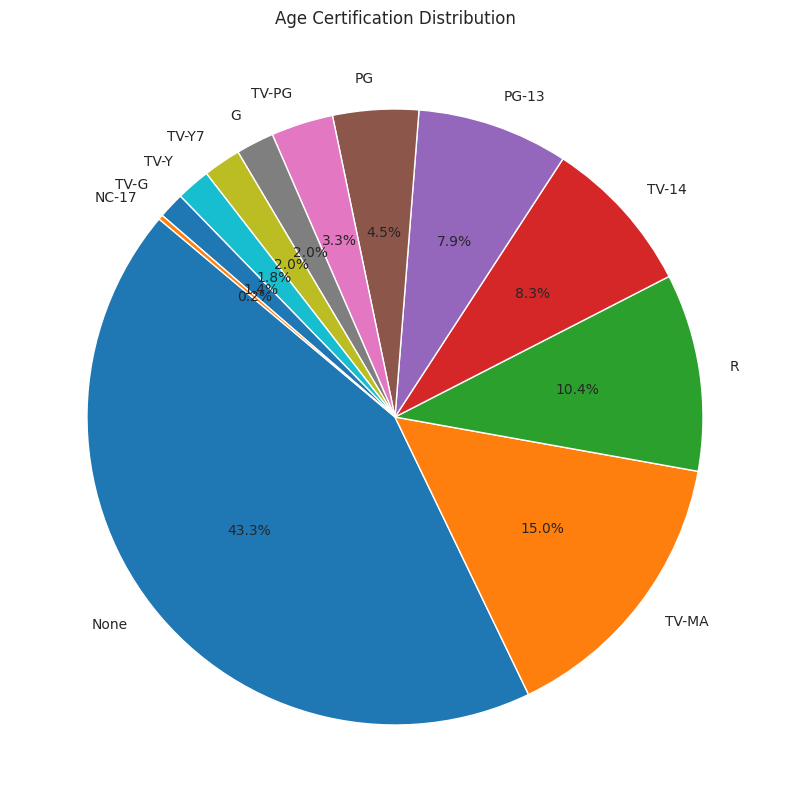

In [ ]:
#3. Pie chart to see the distribution of age certification
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")


age_cert_counts = imdb['age_certification'].value_counts()
plt.pie(age_cert_counts, labels=age_cert_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Age Certification Distribution')

plt.show()

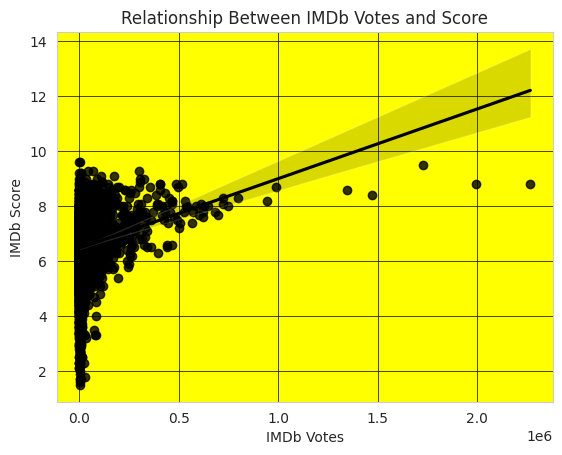

In [ ]:
#4 regression plot between imdb_score and imdb_votes
sns.regplot(x='imdb_votes', y='imdb_score', data = imdb, color = 'black')
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.gca().set_facecolor('yellow')
plt.title('Relationship Between IMDb Votes and Score')
plt.xlabel('IMDb Votes')
plt.ylabel('IMDb Score')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

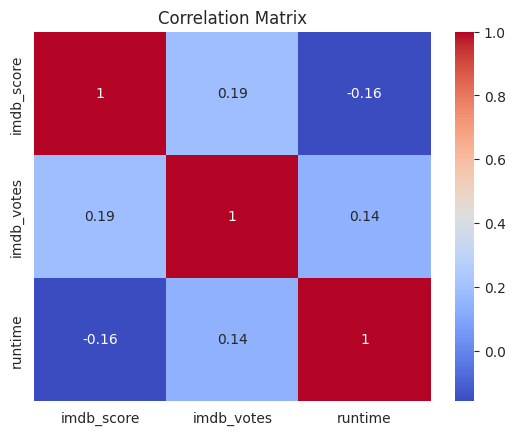

In [ ]:
#5heatmap
correlation_matrix = imdb[['imdb_score', 'imdb_votes', 'runtime']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')